<a href="https://colab.research.google.com/github/VRAHUL8499/spam-and-ham-project-of-rahul-/blob/main/Spam_or_ham_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project to find whether a mail is spam or ham**

**INTRODUCTION** :


In today’s globalized world, email is a primary source of communication. This communication
can vary from personal, business, corporate to government. With the rapid increase in email
usage, there has also been increase in the SPAM emails. SPAM emails, also known as junk email
involves nearly identical messages sent to numerous recipients by email. Apart from being
annoying, spam emails can also pose a security threat to computer system. It is estimated that
spam cost businesses on the order of $100 billion in 2007. In this project, we use text mining to
perform automatic spam filtering to use emails effectively.For this project we use Logistic regression to
 classify the emails as HAM or SPAM

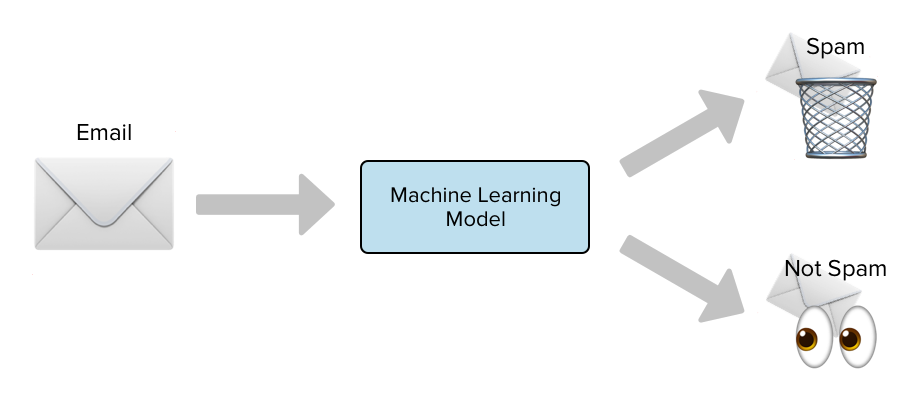

##**Importing required libraries** 

In [62]:
import pandas as pd
import numpy as np 


##**Importing the CSV file as DataFrame by uploading into google colab temporary storage**

In [63]:
raw_mail_data = pd.read_csv('https://github.com/VRAHUL8499/datasetsofrahul/raw/main/mail_data.csv')

##**Removing the null values**

In [64]:
data  = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

##**Get first five rows of the Dataframe**

In [65]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##**Get information of the dataFrame**

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


##**Get the summary statistics of dataframe**

In [67]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [68]:
data.columns

Index(['Category', 'Message'], dtype='object')

##**Label encoding** 

In [69]:
Y = data['Category']

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print('[ham,spam] =',le.classes_)

[ham,spam] = ['ham' 'spam']


Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning

From above we can see that assigned values are ham : 0 ,spam : 1 , 

For our convienvce we need  spam as 0 and ham as 1 for that we do manual encoding as below 

In [71]:
data.replace({'Category' :{'spam' : 0 ,'ham':1}},inplace = True)

##**Defining  X and Y values**

Machine learning algorithms are described as learning a target function (f) that best maps input variables (X) to an output variable (Y). Y = f(X) This is a general learning task where we would like to make predictions in the future (Y) given new examples of input variables (X).

In [72]:
X = data['Message']
Y = data['Category']

##**Process flow diagram** 

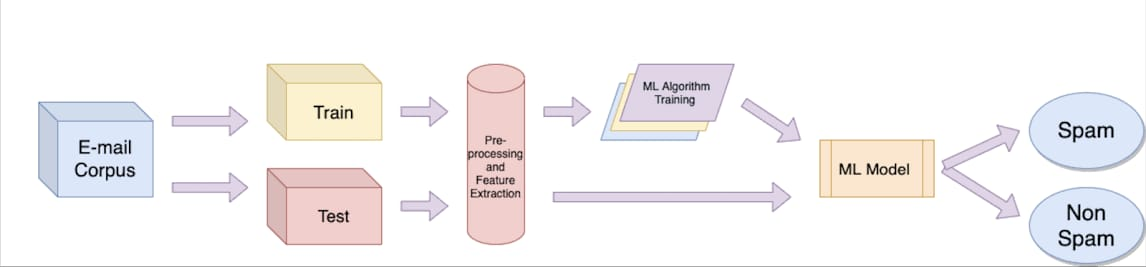

##**Train Test Split**##

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
We need to split a dataset into train and test sets to evaluate how well our machine learning model performs. The train set is used to fit the model, the statistics of the train set are known. The second set is called the test data set, this set is solely used for predictions.

In [73]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state=3)

In [74]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((4457,), (1115,), (4457,), (1115,))

##**Feature Extraction**

Feature extraction refers to the process of transforming raw data into numerical features that can be processed while preserving the information in the original data set. It yields better results than applying machine learning directly to the raw data.

The emails in the learning data are in plain text format. We need to convert the plain text into
features that can represent the emails. Using these features we can then use a learning algorithm
on the emails. A number of pre-processing steps are first performed.
We convert the plain text files to files with one word per line. 

###**Transform the text data to feature vectors that can be used as input to the Logistic regression**

In [75]:

from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

##**Convert Y_train and Y_test values as integers**

In [76]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

##**Training the model using LogisticRegression**


Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_features,Y_train)

LogisticRegression()

##**Evaluating the trained model**

In [78]:
pred_train = model.predict(X_train_features)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_train  = accuracy_score(Y_train,pred_train)
print('Trained model accuracy = {}'.format(accuracy_train))

Trained model accuracy = 0.9670181736594121


##**Evaluating the testing model**

In [80]:
pred_test = model.predict(X_test_features)
accuracy_test  = accuracy_score(Y_test,pred_test)
print('Testing model accuracy = {}'.format(accuracy_test))

Testing model accuracy = 0.9659192825112107


Since there is no major differnce between train model and test model , the model is having good performance 

##**Building a Predictive System**

Predicting the spam or ham mails of our model with some of sample testing data 

In [81]:
input_mail = data.sample(10)['Message']
# using feature extraction to convert text to feature vectors
input_data = feature_extraction.transform(input_mail)

# predicting the ham or spam mail 

prediction = model.predict(input_data)
print(prediction)

for i in prediction: 
  if (i==1):
   print('Ham mail')
  else:
   print('Spam mail')

[1 1 1 1 1 1 1 1 1 1]
Ham mail
Ham mail
Ham mail
Ham mail
Ham mail
Ham mail
Ham mail
Ham mail
Ham mail
Ham mail


In [82]:
print(input_mail)

1170    Msgs r not time pass.They silently say that I ...
313     He says he'll give me a call when his friend's...
4233                             I'm at home. Please call
1990    The basket's gettin full so I might be by tonight
2883      Hi Harish's rent has been transfred to ur Acnt.
843     Our Prashanthettan's mother passed away last n...
380     I taught that Ranjith sir called me. So only i...
1116    So lets make it saturday or monday as per conv...
791     This is hoping you enjoyed your game yesterday...
632                                              Thank u!
Name: Message, dtype: object


##**By giving a random message from the data** 

In [83]:
sample =  data.sample(1)

In [84]:
sample

,Category,Message
4811,1,"Honey, can you pls find out how much they sell..."


In [85]:
input_mail = sample['Message']

# using feature extraction to convert text to feature vectors
input_data = feature_extraction.transform(input_mail)

# predicting the ham or spam mail 

prediction = model.predict(input_data)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


##**CONCLUSION**

So we can see the performance of the model from the predictive system, we are just giving the messages as input and it is telling whether the message is spam or ham(not spam).

implementing spam filtering is extremely important for any organization. Not only does spam filtering help keep garbage out of email inboxes, it helps with the quality of life of business emails because they run smoothly and are only used for their desired purpose

##**REFERENCES**

**DATASET REFERENCE**

dataset is download from the kaggle(www.kaggle.com)

link : https://www.kaggle.com/datasets/bhaskarreddy072/mail-datacsv
